In [ ]:
# !pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [ ]:
# fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
X = phishing_websites.data.features
y = phishing_websites.data.targets

# # metadata
# print(phishing_websites.metadata)

# # variable information
# print(phishing_websites.variables)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()

(6157, 1)

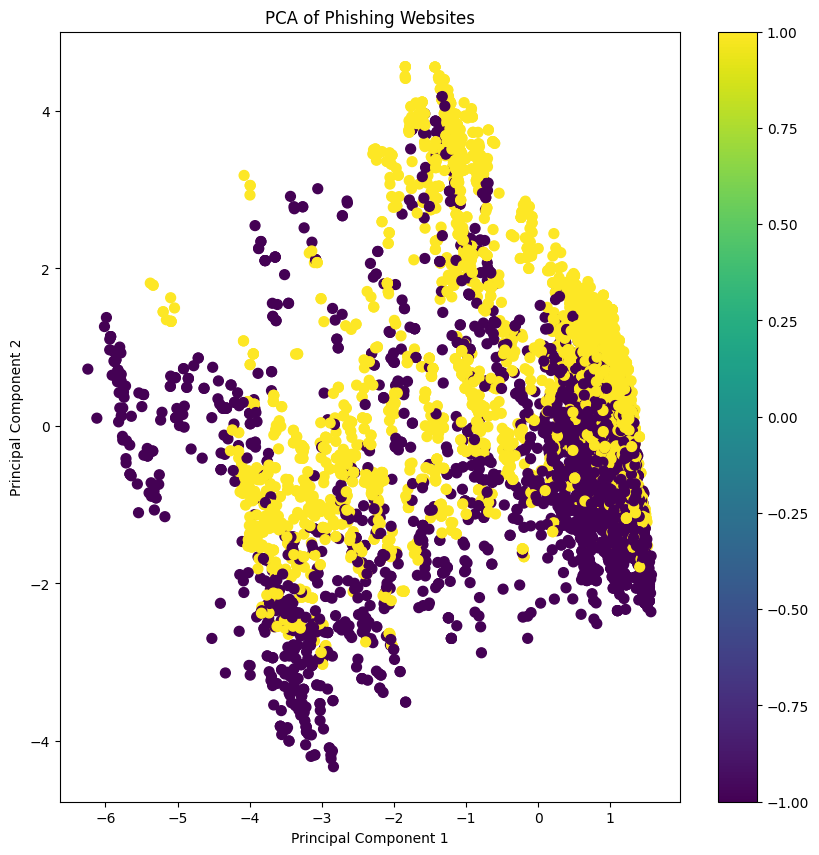

In [ ]:
# prompt: complete PCA on the data and plot results

# Split data into training and testing sets
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_train_pca = pca.fit_transform(X_train)

# Plot results
plt.figure(figsize=(10, 10))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Phishing Websites')
plt.colorbar()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average Accuracy: 0.9273649284446008
Average Precision: 0.927005291884929
Average F1 Score: 0.935426448684165
Average Recall: 0.944091975128179


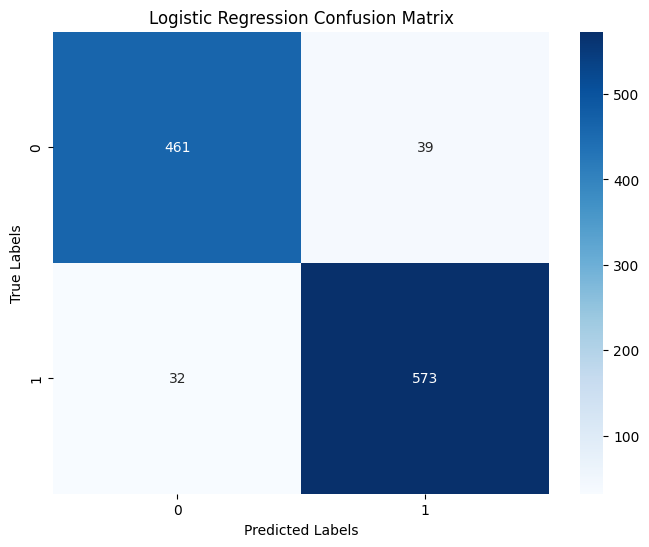

In [ ]:
# Split data into training and testing sets
# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the decision tree model
    logreg_model = LogisticRegression(max_iter=1000)
    logreg_model.fit(X_train, y_train)

    # Make predictions
    y_pred = logreg_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Append the metrics to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    f1_scores.append(f1)
    recall_scores.append(recall)

# Calculate the average of the metrics across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores)


print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average F1 Score: {avg_f1}")
print(f"Average Recall: {avg_recall}")

# confusion matrix with graph
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Average Accuracy: 0.9725922774172961
Average Precision: 0.9692499581831692
Average F1 Score: 0.9755685824337726
Average Recall: 0.9819933972437515


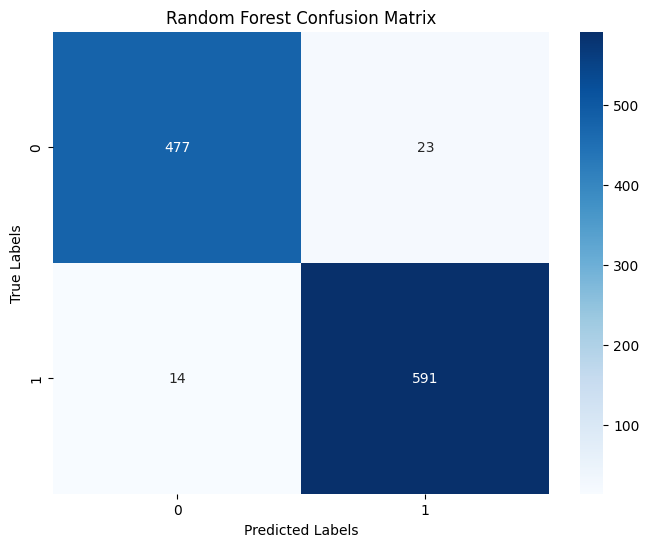

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from ucimlrepo import fetch_ucirepo
import numpy as np

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the random forest model
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Append the metrics to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    f1_scores.append(f1)
    recall_scores.append(recall)

# Calculate the average of the metrics across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores)

print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average F1 Score: {avg_f1}")
print(f"Average Recall: {avg_recall}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

Avg Accuracy: 0.9706917431042525
Avg Precision: 0.971140932707435
Avg F1 Score: 0.9737348977708123
Avg Recall: 0.9764368131592935


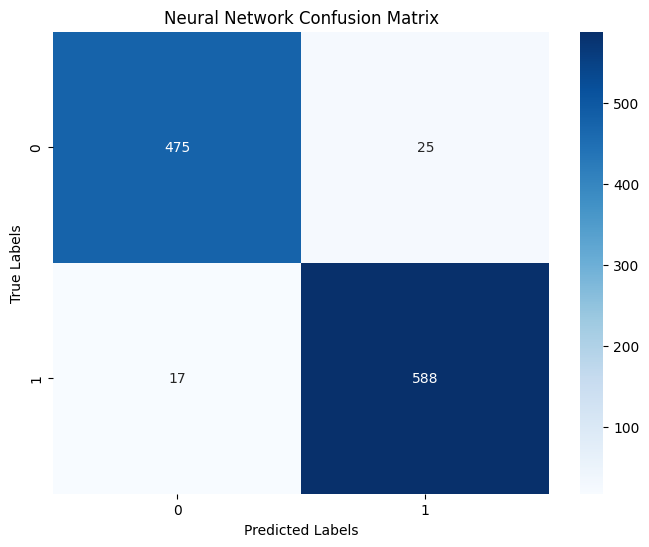

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier

accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf = MLPClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    f1_scores.append(f1)
    recall_scores.append(recall)

print(f"Avg Accuracy: {np.mean(accuracy_scores)}")
print(f"Avg Precision: {np.mean(precision_scores)}")
print(f"Avg F1 Score: {np.mean(f1_scores)}")
print(f"Avg Recall: {np.mean(recall_scores)}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Neural Network Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


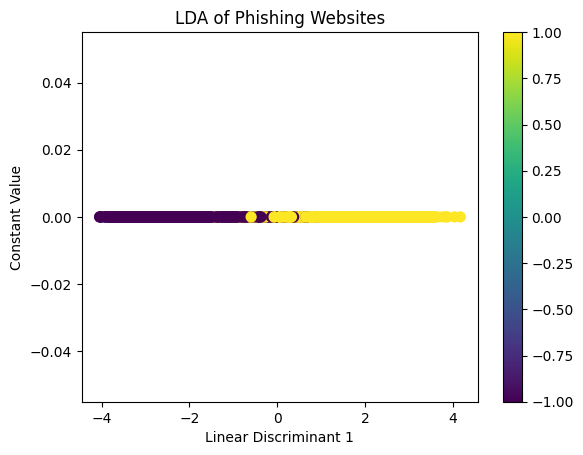

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# graphical lda
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Check the shape of X_lda
if X_lda.shape[1] > 1:
    plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', s=50)
    plt.xlabel('Linear Discriminant 1')
    plt.ylabel('Linear Discriminant 2')
else:
    y = np.array(y).flatten()
    plt.scatter(X_lda[:, 0], [0]*len(X_lda), c=y, cmap='viridis', s=50)
    plt.xlabel('Linear Discriminant 1')
    plt.ylabel('Constant Value')

plt.title('LDA of Phishing Websites')
plt.colorbar()
plt.show()